In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from typing import Optional, List
import scipy
import cython
import math, os, time
from tqdm.auto import tqdm
import pandas as pd
import glob
import seaborn as sns
from scipy.stats import rankdata

In [18]:
data = []
for file in glob.glob("bdata/computation*.csv"):
  print(file)
  data.append(pd.read_csv(file, delimiter=',', ))
data = pd.concat(data)
data = data.reset_index(drop=True)

display(data.head(5))

bdata/computation0.csv
bdata/computation1.csv


,Unnamed: 0,FreeNet_pre_score,FreeNet_post_score,FreeNet_pre_rank,FreeNet_post_rank,FreeNet_delta_ranks,Reversed_pre_score,Reversed_post_score,Reversed_pre_rank,Reversed_post_rank,...,Random_post_score,Random_pre_rank,Random_post_rank,Random_delta_ranks,dist_victim_relayer,out_deg_victim,in_deg_villain,victim,villain,relayer
0,0,125,227,955.5,982.0,26.5,32,32,931.0,931.0,...,0.004527,941.0,948.0,7.0,4,2,31,992,35,381
1,1,20,122,659.5,921.0,261.5,34,34,611.0,611.0,...,0.000477,692.5,699.5,7.0,4,7,4,510,504,481
2,2,92,193,900.5,967.5,67.0,40,40,853.0,853.0,...,0.001327,844.5,846.0,1.5,6,4,12,513,179,764
3,3,0,102,166.5,939.0,772.5,0,4,166.5,453.0,...,0.000136,199.5,538.5,339.0,4,2,0,734,981,524
4,4,0,0,166.5,166.5,0.0,0,0,166.5,166.5,...,0.000000,199.5,199.5,0.0,-1,12,0,62,844,848


<Axes: >

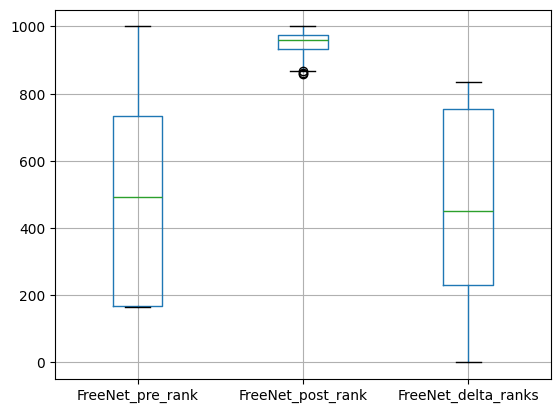

In [19]:
data[data.dist_victim_relayer>=0].boxplot(column=['FreeNet_pre_rank', 'FreeNet_post_rank', 'FreeNet_delta_ranks'])

<Axes: >

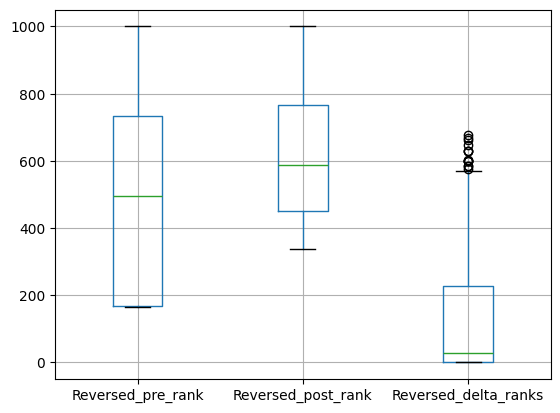

In [20]:
data[data.dist_victim_relayer>=0].boxplot(column=['Reversed_pre_rank', 'Reversed_post_rank', 'Reversed_delta_ranks'])

<Axes: >

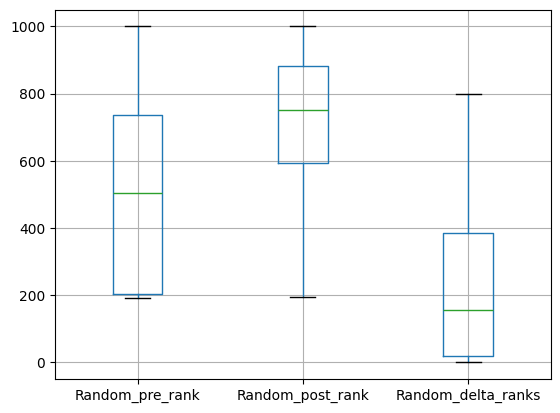

In [21]:
data[data.dist_victim_relayer>=0].boxplot(column=['Random_pre_rank', 'Random_post_rank', 'Random_delta_ranks'])

<Axes: >

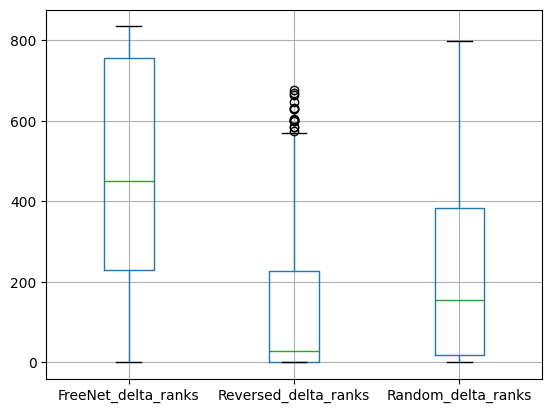

In [22]:
data[data.dist_victim_relayer>=0].boxplot(column=['FreeNet_delta_ranks', 'Reversed_delta_ranks', 'Random_delta_ranks'])

array([[<Axes: title={'center': 'FreeNet_delta_ranks'}>,
        <Axes: title={'center': 'Reversed_delta_ranks'}>],
       [<Axes: title={'center': 'Random_delta_ranks'}>, <Axes: >]],
      dtype=object)

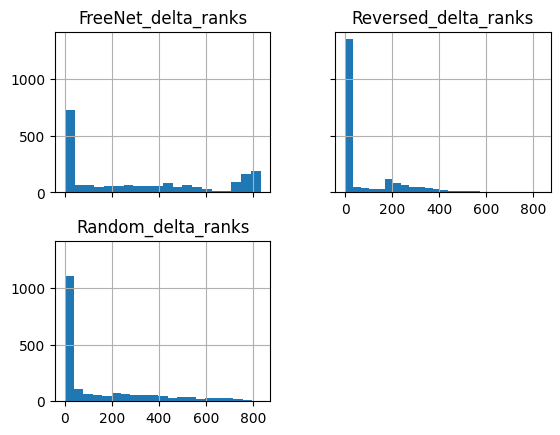

In [24]:
data.hist(column=['FreeNet_delta_ranks', 'Reversed_delta_ranks', 'Random_delta_ranks'], bins=20, sharey=True, sharex=True)